## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path 
from copy import deepcopy
from sklearn.model_selection import train_test_split
from typing import Tuple
from copy import deepcopy

## Draft

In [2]:
root_data = Path('../dataset/')
markers_path = root_data / 'data_markers.csv'
clients_path = root_data / 'client_base.csv'

item_id_column_name = 'ID_SKU'
user_id_column_name = 'Client'

In [3]:
def display_count_in_column(
    df: pd.DataFrame, 
    column: str, 
    column_iter: str = 'item_counter'
) -> None:
    df_count = markers_df[[column, column_iter]].groupby(column).sum()
    display(df_count)

In [4]:
markers_df = pd.read_csv(markers_path)
markers_df['item_counter'] = 1
print(f'len(markers_df) = {len(markers_df)}')

len(markers_df) = 1247887


In [5]:
markers_df.dtypes

Unnamed: 0                   int64
Date                        object
DateDelivery                object
OrderNumberOnTheWebsite     object
NewStatus                   object
SumOrderOnTheWebsite         int64
SumDocument                float64
MethodDelivery              object
PaymentForm                 object
Region                      object
Group2                      object
Group3                      object
Group4                      object
Type                        object
Nomenclature                object
TypeOfgoods                 object
Cancelled                   object
ReasonForCancellation       object
Quantity                     int64
Price                      float64
SumLine                    float64
PurchasePrice              float64
MonthOfTheOrderDate          int64
YearOfOrderDate              int64
PVZ_Code                    object
Status                      object
Geo                         object
Margin                     float64
SumOfServices       

In [6]:
display_count_in_column(markers_df, 'Group2')

,item_counter
Group2,
ДЕТСКОЕ ПИТАНИЕ,256687
ЖЕНСКИЕ ШТУЧКИ,2415
ИГРУШКИ,242731
"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",49402
КОСМЕТИКА/ГИГИЕНА,109664
КРУПНОГАБАРИТНЫЙ ТОВАР,83084
ОБУВЬ,58844
ПОДГУЗНИКИ,120325
СОПУТСТВУЮЩИЕ ТОВАРЫ,2931


In [7]:
display_count_in_column(markers_df, 'Group3')

,item_counter
Group3,
АВТОКРЕСЛА,7811
АКСЕССУАРЫ,24116
АКСЕССУАРЫ ДЛЯ ВОЛОС,595
АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,1847
"АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР",74
...,...
ЧАСЫ/ОЧКИ,53
"ШАПКИ, ШАРФЫ",35
ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,1050


In [8]:
display_count_in_column(markers_df, 'Group4')

,item_counter
Group4,
0-13 кг (люльки-переноски),1144
0-18 кг (автокресла),1459
"15-36 кг (автокресла, бустеры)",1704
9-36 кг (автокресла),2941
АКСЕССУАРЫ ДЛЯ КОЛЯСОК,3840
...,...
электронные игры,1566
энциклопедии,512
юбки,1896


In [9]:
display_count_in_column(markers_df, 'Type')

,item_counter
Type,
ИГРУШКИ,292133
ИНОЕ,16884
КГТ,83084
ОДЕЖДА,296500
ППКП,559286


In [10]:
display_count_in_column(markers_df, 'TypeOfgoods')

,item_counter
TypeOfgoods,
КГТ,82959
МГТ,1164924


In [72]:
items_order_count = markers_df[[item_id_column_name, 'item_counter']].groupby([item_id_column_name]).sum()

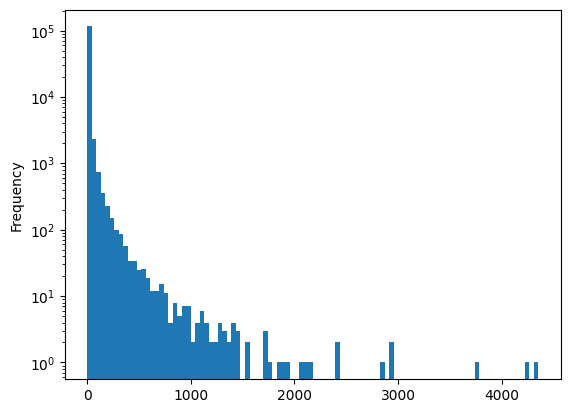

In [73]:
# items_order_count.item_counter.min()
ax = items_order_count.plot.hist(column=["item_counter"], bins=100, log=True, legend=False)
plt.show()

In [64]:
users_order_count = markers_df[[user_id_column_name, 'item_counter']].groupby([user_id_column_name]).sum()
print(len(users_order_count))

8575


In [9]:
clients_df = pd.read_csv(clients_path)
print(f'len(clients_df) = {len(clients_df)}')

len(clients_df) = 177343


In [10]:
list(clients_df.columns)

['Unnamed: 0',
 'client_id',
 'DistinctCountOrders',
 'AverageNumItemsInOrder',
 'RevenueClient',
 'cnt_purchased_orders',
 'AvgOrderSumPurchased',
 'AvgNumItemsOrderPurchased',
 'RevenueClientPurchased',
 'PurchasedItems',
 'AvgMarginPurchased',
 'SharePurchasedOrders',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ЖЕНСКИЕ ШТУЧКИ',
 'ИГРУШКИ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
 'КОСМЕТИКА/ГИГИЕНА',
 'КРУПНОГАБАРИТНЫЙ ТОВАР',
 'ОБУВЬ',
 'ПОДГУЗНИКИ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ',
 'ИГРУШКИ.1',
 'ИНОЕ',
 'КГТ',
 'ОДЕЖДА',
 'ППКП',
 'CENTRAL',
 'FAR EAST',
 'NORTH',
 'PRIVOLZIE',
 'SIBERIA',
 'SOUTHERN',
 'URAL',
 'Cluster']

## Data Normalization and Preparation

### Prepare Clients Dataset

In [2]:
root_data = Path('../dataset/')
clients_path = root_data / 'client_base.csv'

client_id_column_name = 'client_id'

columns_to_delete = [
    'Unnamed: 0',
    'Cluster', 
]

In [3]:
clients_df = pd.read_csv(clients_path)
# {c: all(clients_df[c] == 0.) for c in clients_df.columns}
columns_to_delete += [c for c in clients_df.columns if all(clients_df[c] == 0.)]
clients_df.drop(columns_to_delete, axis=1, inplace=True)
clients_df.set_index(client_id_column_name, inplace=True)

clients_description_df = clients_df.describe()
clients_description_df.to_csv(root_data / 'clients_description.csv', index=True)

clients_normalized_df = (clients_df-clients_df.mean())/clients_df.std()
clients_normalized_df.to_csv(root_data / 'clients_normalized.csv', index=True)

### Prepare item-user-count Dataset

In [4]:
root_data = Path('../dataset/')
markers_path = root_data / 'data_markers.csv'

item_id_column_name = 'ID_SKU'
user_id_column_name = 'Telephone_new'

In [5]:
markers_df = pd.read_csv(markers_path)
markers_df['count'] = 1
print(f'len(markers_df) = {len(markers_df)}')

len(markers_df) = 1247887


In [6]:
dataset = markers_df[[item_id_column_name, user_id_column_name, 'count']]
dataset = dataset.groupby([user_id_column_name, item_id_column_name])['count'].sum().to_frame().reset_index()
dataset.rename(columns={user_id_column_name: 'user', item_id_column_name: 'item'}, inplace=True)

In [7]:
dataset.to_csv(root_data / 'dataset_user-item-count.csv', index=False)

In [8]:
dataset

,user,item,count
0,0,ID000s000310553,1
1,0,ID000s000545856,1
2,0,ID000sm-0076250,1
3,0,ID000sm-0150957,1
4,0,ID000sm-0474856,1
...,...,...,...
1098252,57565352-56495256545597,IDL00047888048,1
1098253,57575054-51535748525390,ID9010000690351,2
1098254,57575757-48485048565195,ID000so-4602149,1
1098255,71764848-485149524951G3,IDL00031412755,1


In [9]:
c = 'item' # 'user', 'item'
for c in ['user', 'item']:
    index_item_df = dataset[[c]].groupby(c).sum()
    index_item_df.reset_index(inplace=True)
    index_item_df.to_csv(root_data / f'index_{c}.csv', index=True)

In [10]:
root_dir = Path('../dataset/')

index_item_df = pd.read_csv(root_dir / 'index_item.csv', index_col=0)
index_user_df = pd.read_csv(root_dir / 'index_user.csv', index_col=0)

index_item_df['index'] = np.arange(len(index_item_df))
index_user_df['index'] = np.arange(len(index_user_df))

index_item_df.set_index('item', inplace=True)
item2index = index_item_df.to_dict()

index_user_df.set_index('user', inplace=True)
user2index = index_user_df.to_dict()


In [11]:
dataset_indexed = deepcopy(dataset)

In [12]:
dataset_indexed['user'] = dataset['user'].map(user2index['index'])
dataset_indexed['item'] = dataset['item'].map(item2index['index'])

In [13]:
dataset_indexed.to_csv(root_dir / 'dataset_indexed.csv', index=False)

In [14]:
dataset_indexed.head(5)

,user,item,count
0,0,0,1
1,0,10,1
2,0,19,1
3,0,22,1
4,0,45,1


### Train/Test split

In [15]:
def split_train_test(dataset: pd.DataFrame, test_size: float = 0.05, min_items_for_test: int = 10, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    dataset_ = deepcopy(dataset)
    dataset_['_count_'] = 1
    names = dataset_[['user', '_count_']].groupby('user').sum()
    names.reset_index(inplace=True)
    names = names[names['_count_'] >= min_items_for_test]
    users_train, users_test = train_test_split(names['user'].values, random_state=random_state, test_size=test_size)
    
    test_data = pd.DataFrame(columns=dataset_.columns[:-1])
    for user_idx in users_test:
        idxs_with_user = dataset_[dataset_['user'] == user_idx].index.tolist()
        _, hide_idxs = train_test_split(idxs_with_user, random_state=random_state, test_size=test_size)
        dataset_['count'][hide_idxs] = 0
        test_data = pd.concat([test_data, deepcopy(dataset.loc[hide_idxs])])

    dataset_.drop('_count_', axis='columns', inplace=True)
    return dataset_, test_data


# train_dataset, test_dataset = train_test_split(dataset_indexed, random_state=42, test_size=0.1)
train_dataset, test_dataset = split_train_test(dataset_indexed)

In [16]:
test_dataset.to_csv(root_dir / 'dataset_indexed_test.csv', index=False)
train_dataset.to_csv(root_dir / 'dataset_indexed_train.csv', index=False)